In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Planet:
    '''Planet class takes orbital radius and year length of a planet.'''
    
    def __init__ (self, radius: float, yearLength: int):
        '''Initialization for Planet class.''' 
        
        self.r = radius
        #Instance variable radius of a planet. 
        self.y = yearLength
        #Instance variable year length in days of a planet. 
        
    def position(self, day):
        '''Returns position of the planet on given day.'''
        
        day = day % self.y
        #Calculate the remainder days to make sure complete an orbit.
        angle = (day/self.y) * 2 * math.pi
        #Calculate angle, formula explain above.
        
        x = self.r * math.cos(angle)
        #Calculate adjacent.
        y = self.r * math.sin(angle)
        #Calculate opposite.
        
        return x, y

    def __repr__(self):
        '''Print radus and year length of given planet.'''
        
        return f'''Planet with orbital radius {self.r} and year length {self.y}.'''

In [3]:
def distance(planet1, planet2, day):
    '''Returns the distance between two planets on given day.'''
    
    x1, y1 = planet1.position(day)
    #Coordinates of planet 1 at given day. 
    x2, y2 = planet2.position(day)
    #Coordinates of planet 2 at given day. 
    
    xDiff = x2 - x1
    yDiff = y2 - y1
    #Calculate the difference between 2 coordinates. 
    
    planetDistance = math.sqrt(xDiff**2 + yDiff**2)
    #Calculate the distance between 2 planets.
    
    return planetDistance

In [4]:
def sim1():
    '''First simulation runs 1000 Earth years. Returns average distance between evrey pair of planets.'''
    
    Mercury = Planet(3.5,88)
    Venus = Planet(6.7 ,225)
    Earth = Planet(9.3 ,365)
    Mars = Planet(14.2,687)
    Jupiter = Planet(48.4 ,4333)
    Saturn = Planet(88.9 ,10759)
    Uranus = Planet(179 ,30687)
    Neptune = Planet(288 ,60190)
    #Generate 8 planets with using Planet class.
    
    planets = [Mercury,Venus,Earth,Mars,Jupiter,Saturn,Uranus,Neptune]
    #Assign 'planets' list stores all planet.
    numPlanets = len(planets)
    #Total number of planets. Should be 8.
    simDays = 1000 * 365
    #Initiate simulation date: 1000 Earth years.
    
    avgDistances = np.zeros((numPlanets, numPlanets))  
    #Initialize numpy array with zeros. Size is the total number of planets. 
    
    for i in range(numPlanets):
    #Iterate over first planet.
        for j in range(i + 1, numPlanets):
        #Iterate over second planet. 
            planet1 = planets[i]
            planet2 = planets[j]
            #Assign first and second planets.
            
            totalDistance = 0
            #Initiate total distance. 
            
            for day in range(simDays):
            #Iterate over each day of the simulation's time frame. 
                planetDistance = distance(planet1, planet2, day)
                #Distance of a pair of planets on the iterated day.
                totalDistance += planetDistance
                #Add the calculated distance to total distance. 
            
            avgDistances[i][j] = totalDistance / simDays
            #The average distance of planet [i] and planet [j] equals to 
            #the sum of distance accumulated from each day divided by total simulation days.
            #Store average distance in an array.
            
            avgDistances[j][i] = avgDistances[i][j]  
            #Copy average distance values diagonally like a mirror (upper/lower triangle).
            
    planetChart = pd.DataFrame(avgDistances, columns=['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'], 
                                  index=['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'])
    #Generate a 2-dimensional dataframe using pandas library. 
    #Data is calculated average distance, 8 planets columns, 8 planets index values. 
    #Should be 8x8 chart.
    
    print(planetChart.to_string())
    #Print the chart.
    #I use to_string() method to make sure the chart printed in one table. 
    
    earthDistances = planetChart.loc['Earth']
    #Label indexing 'planetChart' to obtain all average distance of Earth (row wise). 
    
    minDistance = earthDistances[earthDistances.index != 'Earth'].min()
    #Find the smallest value in the average distance series objects, excluding Earth's. 
    closestPlanet = earthDistances[earthDistances == minDistance].index[0]
    #Series object of the smallest value. Get the index label of smallest value. 
    
    print("\n")
    print(f"The planet closest to Earth on average is {closestPlanet} with an average distance of {minDistance}.")
    #Print closest planet to Earth with corresponding distance. 

In [5]:
def sim2():
    '''Second simulation runs 1000 days. Returns a time series plot and 3 text files of distances between planets.'''
    
    Mercury = Planet(3.5, 88)
    Venus = Planet(6.7, 225)
    Mars = Planet(14.2, 687)
    Earth = Planet(9.3, 365)
    #Generate 4 planets with using Planet class.
    
    simDays = 1000
    #Initiate simulation date: 1000 days.
    
    with open('Earth_Mercury.txt', 'w') as outfile1, open('Earth_Venus.txt', 'w') as outfile2, open('Earth_Mars.txt', 'w') as outfile3:
    #Open 3 files to write. Files should start empty.
    
        for day in range(simDays):
        #Iterate over each day of the simulation's time frame. 
            mercuryDistance = distance(Earth, Mercury, day)
            venusDistance = distance(Earth, Venus, day)
            marsDistance = distance(Earth, Mars, day)
            #Calculate the distances from Earth to corresponding planets on given day. 

            outfile1.write(str(mercuryDistance) + '\n')
            outfile2.write(str(venusDistance) + '\n')
            outfile3.write(str(marsDistance) + '\n')
            #Write each distance result to the correspondiong outfile. 
            #Every distance is a new line.

    mercury_df = pd.read_table('Earth_Mercury.txt', names=['Mercury'])
    venus_df = pd.read_table('Earth_Venus.txt', names=['Venus'])
    mars_df = pd.read_table('Earth_Mars.txt', names=['Mars'])
    #Create 3 data frames acoordingly for each text file. 
    #read_table() function to read data from a text file.
    #Assign column's name as planet's name. 
    
    figure, axisArray = plt.subplots()
    mercury_df.plot(ax=axisArray, label='Mercury')
    venus_df.plot(ax=axisArray, label='Venus')
    mars_df.plot(ax=axisArray, label='Mars')
    #Plot each data frame using planet label. 
    
    plt.xlabel('Day')
    plt.ylabel('Distance')
    plt.title('Distance from Earth to Mercury, Venus, Mars over 1000 days')
    plt.legend()
    #Set up labels, title, and legend.
    
    plt.show()

In [6]:
sim1()

            Mercury       Venus       Earth        Mars     Jupiter      Saturn      Uranus     Neptune
Mercury    0.000000    7.165479    9.632488   14.416431   48.463277   88.934577  179.017224  288.010741
Venus      7.165479    0.000000   10.550754   15.002459   48.632216   89.025632  179.062106  288.038410
Earth      9.632488   10.550754    0.000000   15.771544   48.849381   89.142677  179.119881  288.075670
Mars      14.416431   15.002459   15.771544    0.000000   49.445326   89.464711  179.279206  288.170766
Jupiter   48.463277   48.632216   48.849381   49.445326    0.000000   95.490784  182.202017  289.948424
Saturn    88.934577   89.025632   89.142677   89.464711   95.490784    0.000000  190.081366  295.306532
Uranus   179.017224  179.062106  179.119881  179.279206  182.202017  190.081366    0.000000  320.885379
Neptune  288.010741  288.038410  288.075670  288.170766  289.948424  295.306532  320.885379    0.000000


The planet closest to Earth on average is Mercury with an aver

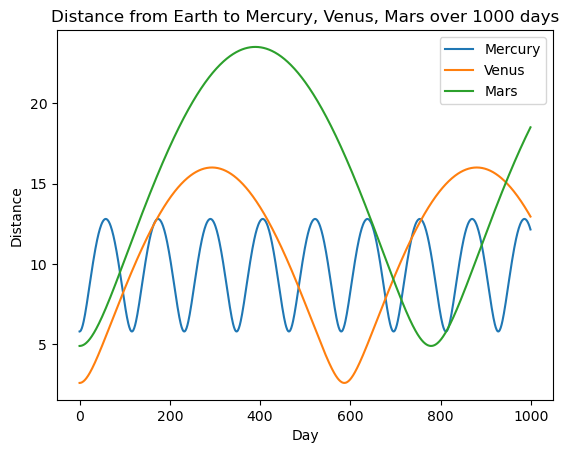

In [7]:
sim2()